# Практический семинар по деревьям и бэггингу

### Визуализация разделяющих поверхностей в sklearn

Научимся изображать разделяющие поверхности в осях призанк 1 - признак 2, используя numpy, sklearn и matplotlib

In [2]:
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_moons
import pandas as pd

Создаем синтетические данные с двумя признаками и двумя классами:

In [3]:
X, Y = make_moons(n_samples=100, shuffle=True, noise=0.3, \
                  random_state=3)

Визуализируем выборку:

Text(0,0.5,'feature 2')

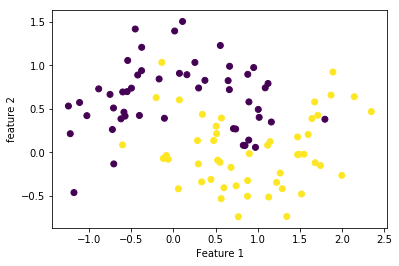

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel("Feature 1")
plt.ylabel("feature 2")

Обучим решающее дерево:

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Чтобы нарисовать разделяющую поверхность, сделаем следующее: 
1. сделаем большую тестовую выборку, которая покроет точками нашу плоскость (с  каким-то шагом);
1. сделаем предсказания для нашей выборки.

In [5]:
# делаем выборку - сетку
h = .02  # шаг сетки
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # границы
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # границы
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h)) # сетка

Смотрим форму:

In [6]:
xx.shape, yy.shape

((163, 230), (163, 230))

Получилось 163 точки по вертикали и 230 по горизонтали.

Вытяните обе матрицы в вектор (.reshape(-1, 1)), соедините в матрицу (np.hstack) и сделайте предсказания решающего дерева:

In [15]:
# предсказания на сетке
### your code here
data = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
preds = tree.predict(data)

Text(0,0.5,'feature 2')

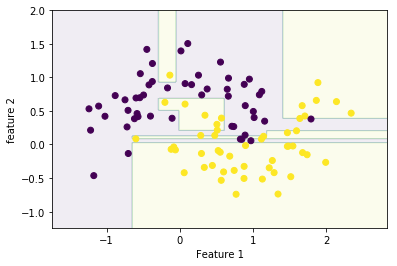

In [16]:
Z = preds.reshape(xx.shape) # меняем обратно в форму сетки
plt.contourf(xx, yy, Z, alpha=.08) # рисуем границы

# копируем код рисования выборки
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel("Feature 1")
plt.ylabel("feature 2")

### Гиперпараметры решающих деревьев

Соберем код в одну функцию (скопируйте в нее ваш код):

In [19]:
def plot_classes(tree, X, Y):
    h = .02  # шаг сетки
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) # сетка
    # предсказания на сетке
    ### СКОПИРУЙТЕ СЮДА ВАШ КОД
    data = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
    preds = tree.predict(data)
    ###
    Z = preds.reshape(xx.shape)
    # границы
    plt.contourf(xx, yy, Z, alpha=.08)
    
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.xlabel("Feature 1")
    plt.ylabel("feature 2")

Попробуйте менять гиперпараметр max_depth решающего дерева: для каждого значения обучите решающее дерево с выбранным значением гиперпараметра, вызовите функцию plot\_classes, в конце напишите plt.show() (чтобы рисунки не наслаивались).

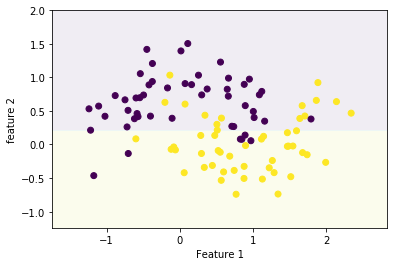

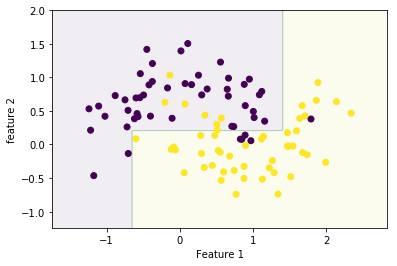

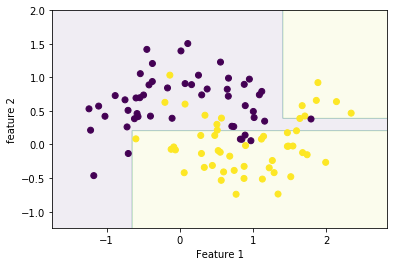

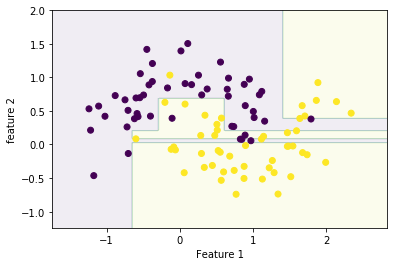

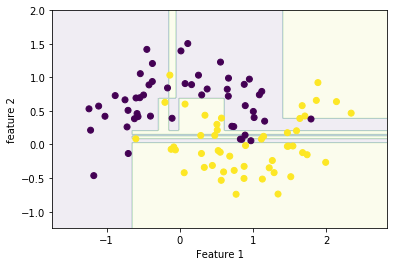

In [20]:
for max_depth in [1, 2, 3, 5, 10]:
    ### your code here
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, Y)
    plot_classes(tree, X, Y)
    plt.show()

На что влияет гиперпараметр?

Чем больше допустимая глубина, тем сложнее дерево и тем больше возможностей к переобучению.

Повторите те же шаги с другим гиперпараметром: min\_samples\_leaf

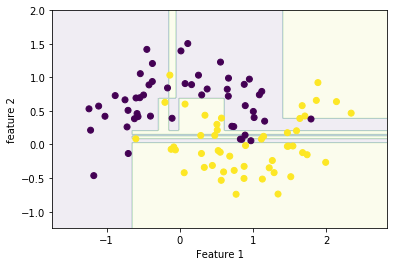

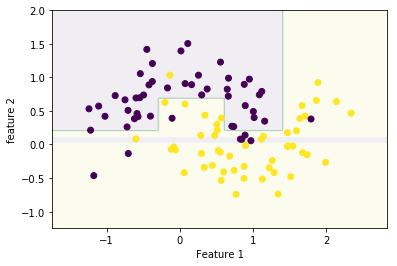

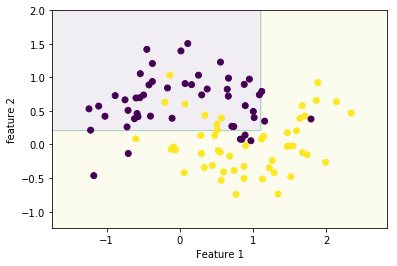

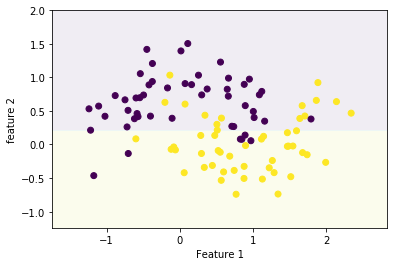

In [22]:
for min_samples_leaf in [1, 5, 10, 20]:
    ### your code here
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    tree.fit(X, Y)
    plot_classes(tree, X, Y)
    plt.show()

На что влияет гиперпараметр?

При большом min_samples_leaf нельзя делать листья с малым числом объектов, и переобучиться на обучающую выборку становистя сложнее.

Повторите с max\_leaf\_nodes:

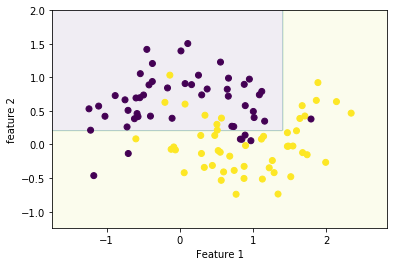

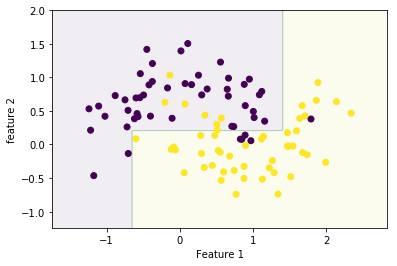

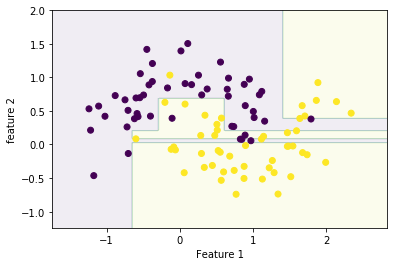

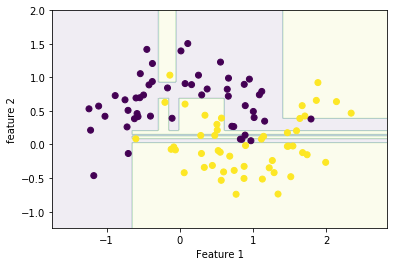

In [24]:
for max_leaf_nodes in [3, 5, 10, 20]:
    ### your code here
    tree = DecisionTreeClassifier(max_leaf_nodes=k)
    tree.fit(X, Y)
    plot_classes(tree, X, Y)
    plt.show()

### Обучение решающего дерева на бутстрапированных выборках

Теперь попробуем обучать решающее дерево на разных подвыборках одной выборки, а точнее, на бутстрапированных выборках. Напомним: бэггинг - это метод композиции, в котором каждый базовый алгоритм обучается на своей выборке. Выборки обычно получают из исходной выборки бутстрапом: генерируют индексы объектов (с возвращением) и выбирают соответствующие объекты исходной выборки.

Для начала сгенерируйте одну выборку методом случайного выбора объектов с возвращением с помощью np.random.randint (в качестве минимума используйте 0, в качестве максимума - длину выборки, size также равен длине выборки):

In [31]:
### student's code here
# idxs = 
idxs = np.random.randint(0, X.shape[0], size=X.shape[0])
X_bag = X[idxs]
Y_bag = Y[idxs]

Посмотрите, сколько уникальных индексов в idxs:

In [33]:
len(set(idxs)) / len(idxs)

0.63

Получилось столько же, сколько получается в теории.

Наша следующая задача - обучить три решающих дерева, каждую на своей сгенерированной выборке, и визуализировать их разделяющие поверхности.

Выполните цикл по деревьям, на каждом шаге сгенерируйте выборку из X, Y методом генерации объектов с возвращением и обучите на ней решающее дерево. Визуализируйте разделяющую поверхность функцией  plot_classes:

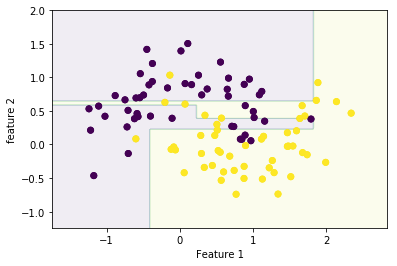

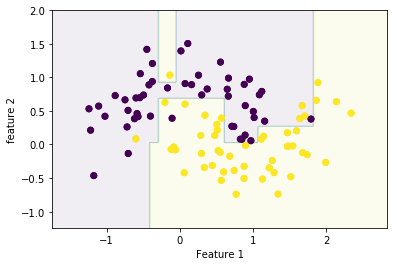

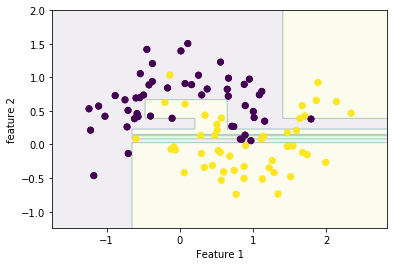

In [27]:
num_trees = 3
### student's code here
for i in range(num_trees):
    tree = DecisionTreeClassifier(random_state=1)
    idxs = np.random.randint(0, X.shape[0], size=X.shape[0])
    X_bag = X[idxs]
    Y_bag = Y[idxs]
    tree.fit(X_bag, Y_bag)
    plot_classes(tree, X, Y)
    plt.show()

Все три дерева сильно различны, хотя обучаются на подножествах одного множества объектов. На этом свойстве и основан успех решающих деревьев при построении композиций: предсказания деревьев различаются, и в результате деревья "компенсируют" ошибки друг друга.

### Обучение бэггинга

В предыдущем задании мы обучали отдельные решающие деревья, но каждое - на своей подвыборке. Давайте обучим бэггинг, в котором предсказания будут выполняться с помощью усреднения предсказаний отдельных деревьев.

Обучите бэггинги с числом деревьев 1, 3, 5, 10, 100 и визуализируйте их разделяющие поверхности. Гиперпараметр числа деревьев в бэггинге называется n\_estimators. Не забудьте plt.show().

In [28]:
from sklearn.ensemble import BaggingClassifier

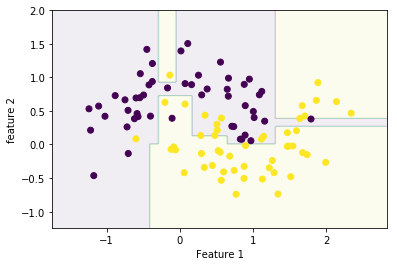

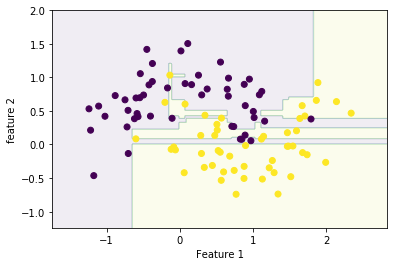

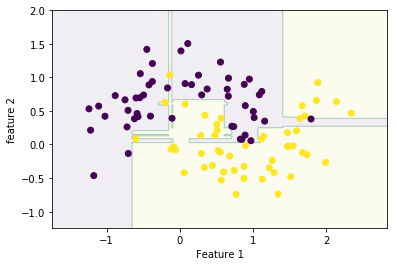

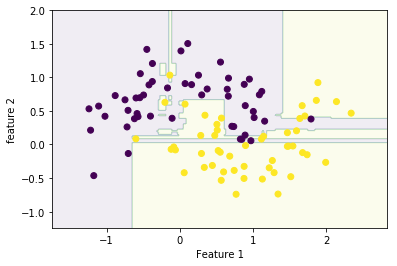

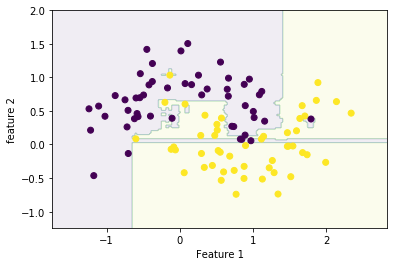

In [35]:
for num_trees in [1, 3, 5, 10, 100]:
    ### your code here
    bagging = BaggingClassifier(n_estimators=num_trees)
    bagging.fit(X, Y)
    plot_classes(bagging, X, Y)
    plt.show()

Как меняется разделяющая поверхность?

Глобально областей становится меньше, но их границы - сложнее (из-за усреднения).

### Подбор гиперпараметров решающего дерева

Подберите оптимальные гиперпараметры решающего дерева, используя кросс-валидацию, и визуализируйте дерево с выбранными гиперпараметрами. Сетки гиперпараметров можно использовать те же, что в задании "Гиперпараметры решающих деревьев".

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
### your code here
param_grid = {"max_depth":[1, 2, 3, 5, 10],\
             "min_samples_leaf":[1, 5, 10, 20],\
             "max_leaf_nodes":[3, 5, 10, 20]}
gs = GridSearchCV(DecisionTreeClassifier(), param_grid)
gs.fit(X, Y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 5, 10], 'min_samples_leaf': [1, 5, 10, 20], 'max_leaf_nodes': [3, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
gs.best_params_

{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}

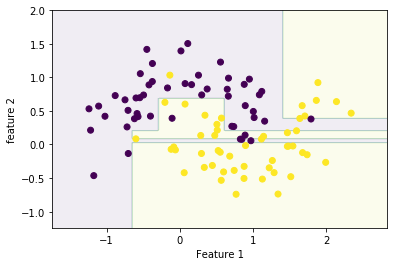

In [39]:
plot_classes(gs, X, Y)